<H1><b>Import Library</b><H1>

In [291]:
import pandas as pd
from textblob import TextBlob
from googletrans import Translator
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/indodax/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<H1><b>Show Dataframe</b></H1>

In [292]:
df = pd.read_csv('tbl_cnn.csv')
df.head(3)

,_id,author,content,publishedAt,slug,source,tag,title,url,urlToImage
0,610a281ce12961efb18c37ff,CNN Indonesia,Menteri Ketenagakerjaan (Menaker) Ida Fauziyah...,2021-08-04 12:28,3-beda-blt-subsidi-gaji-2021-vs-2020,CNN Indonesia,"blt, bsu",3 Beda BLT Subsidi Gaji 2021 vs 2020,https://www.cnnindonesia.com/ekonomi/202108041...,https://akcdn.detik.net.id/visual/2020/08/11/i...
1,610a281ce12961efb18c3800,CNN Indonesia,Anggota Komisi II DPR Fraksi Golkar Zulfikar A...,2021-08-04 12:22,tinggi-kematian-jateng-dalam-sebulan-sinyal-kr...,CNN Indonesia,pesawat presiden,"Tinggi Kematian Jateng dalam Sebulan, Sinyal K...",https://www.cnnindonesia.com/nasional/20210804...,https://akcdn.detik.net.id/visual/2021/08/03/p...
2,610a281ce12961efb18c3801,CNN Indonesia,"Harga Batu bara Acuan (HBA) menguat 13,55 pers...",2021-08-04 09:50,harga-batu-bara-acuan-tembus-us13099-per-ton-a...,CNN Indonesia,"batu bara, harga batu bara acuan","Harga Batu Bara Acuan Tembus US$130,99 per Ton...",https://www.cnnindonesia.com/ekonomi/202108040...,https://akcdn.detik.net.id/visual/2019/11/11/4...


<H1><b>Data preprocessing</b></H1>

<H2><b>1. Data Cleansing</b></H2>

In [293]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16792 entries, 0 to 16791
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   _id          16792 non-null  object
 1   author       15260 non-null  object
 2   content      14019 non-null  object
 3   publishedAt  6883 non-null   object
 4   slug         16792 non-null  object
 5   source       16792 non-null  object
 6   tag          16792 non-null  object
 7   title        16792 non-null  object
 8   url          16792 non-null  object
 9   urlToImage   14009 non-null  object
dtypes: object(10)
memory usage: 1.3+ MB


In [294]:
df = df.drop_duplicates(subset=['title'])
df = df.dropna(subset=['title'])
df = df.dropna()
df.reset_index(inplace=True)

In [295]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2309 entries, 0 to 2308
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   index        2309 non-null   int64 
 1   _id          2309 non-null   object
 2   author       2309 non-null   object
 3   content      2309 non-null   object
 4   publishedAt  2309 non-null   object
 5   slug         2309 non-null   object
 6   source       2309 non-null   object
 7   tag          2309 non-null   object
 8   title        2309 non-null   object
 9   url          2309 non-null   object
 10  urlToImage   2309 non-null   object
dtypes: int64(1), object(10)
memory usage: 198.6+ KB


In [296]:
data = df[['source','title']]
data.head()

,source,title
0,CNN Indonesia,3 Beda BLT Subsidi Gaji 2021 vs 2020
1,CNN Indonesia,"Tinggi Kematian Jateng dalam Sebulan, Sinyal K..."
2,CNN Indonesia,"Harga Batu Bara Acuan Tembus US$130,99 per Ton..."
3,CNN Indonesia,"China Tes Covid Massal, Deteksi Kasus Tertingg..."
4,CNN Indonesia,BNPB Kirim Masker dan Tabung Oksigen ke Papua ...


<H2><b>2. Data Labeling</b></H2>

In [226]:
title1 = []
for i in range(0,500):
    to_translate = data['title'][i]
    translated = GoogleTranslator(source='auto', target='en').translate(to_translate)
    title1.append(translated)

In [229]:
title2 = []
for i in range(500,1000):
    to_translate = data['title'][i]
    translated = GoogleTranslator(source='auto', target='en').translate(to_translate)
    title2.append(translated)

In [230]:
title3 = []
for i in range(1000,1500):
    to_translate = data['title'][i]
    translated = GoogleTranslator(source='auto', target='en').translate(to_translate)
    title3.append(translated)

In [231]:
title4 = []
for i in range(1500,2309):
    to_translate = data['title'][i]
    translated = GoogleTranslator(source='auto', target='en').translate(to_translate)
    title4.append(translated)

In [297]:
title_en = title1 + title2 + title3 + title4
data['title(en)'] = title_en
data.head()

<ipython-input-297-dc05732327c6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['title(en)'] = title_en


,source,title,title(en)
0,CNN Indonesia,3 Beda BLT Subsidi Gaji 2021 vs 2020,3 Different Salary Subsidy BLT 2021 vs 2020
1,CNN Indonesia,"Tinggi Kematian Jateng dalam Sebulan, Sinyal K...","High Mortality in Central Java in a Month, a C..."
2,CNN Indonesia,"Harga Batu Bara Acuan Tembus US$130,99 per Ton...",Reference Coal Price Translucent US$130.99 per...
3,CNN Indonesia,"China Tes Covid Massal, Deteksi Kasus Tertingg...","China Mass Covid Tests, Highest Case Detection..."
4,CNN Indonesia,BNPB Kirim Masker dan Tabung Oksigen ke Papua ...,BNPB Sends Masks and Oxygen Cylinders to West ...


In [298]:
def pol(text):
    return TextBlob(text).sentiment.polarity
data['polarity'] = data['title(en)'].apply(pol) 

data['label'] = np.where(data['polarity'] > 0,'positif','negatif')
data['label'] = np.where(data['polarity'] == 0,'neutral',data['label'])
data.head()

<ipython-input-298-3f6c35d52a0c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['polarity'] = data['title(en)'].apply(pol)
<ipython-input-298-3f6c35d52a0c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['label'] = np.where(data['polarity'] > 0,'positif','negatif')
<ipython-input-298-3f6c35d52a0c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

,source,title,title(en),polarity,label
0,CNN Indonesia,3 Beda BLT Subsidi Gaji 2021 vs 2020,3 Different Salary Subsidy BLT 2021 vs 2020,0.000000,neutral
1,CNN Indonesia,"Tinggi Kematian Jateng dalam Sebulan, Sinyal K...","High Mortality in Central Java in a Month, a C...",0.053333,positif
2,CNN Indonesia,"Harga Batu Bara Acuan Tembus US$130,99 per Ton...",Reference Coal Price Translucent US$130.99 per...,0.000000,neutral
3,CNN Indonesia,"China Tes Covid Massal, Deteksi Kasus Tertingg...","China Mass Covid Tests, Highest Case Detection...",0.000000,neutral
4,CNN Indonesia,BNPB Kirim Masker dan Tabung Oksigen ke Papua ...,BNPB Sends Masks and Oxygen Cylinders to West ...,0.000000,neutral


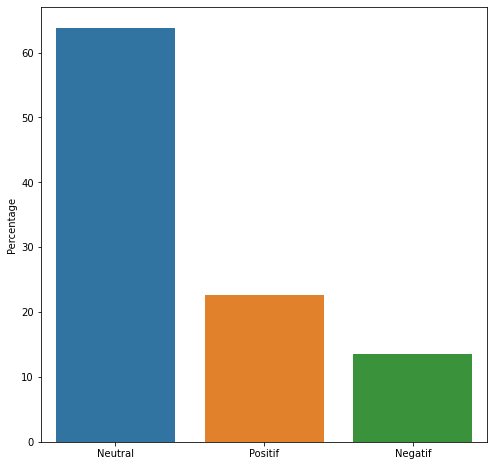

In [299]:
fig, ax = plt.subplots(figsize=(8, 8))
counts = data['label'].value_counts(normalize=True) * 100
sns.barplot(x=counts.index, y=counts, ax=ax)
ax.set_xticklabels(['Neutral', 'Positif', 'Negatif'])
ax.set_ylabel("Percentage")
plt.show()

<H2><b>3. Case Folding</b></H2>

In [300]:
data["title(en)"] = data["title(en)"].str.lower()
data.head()

<ipython-input-300-9754a6abe1ab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["title(en)"] = data["title(en)"].str.lower()


,source,title,title(en),polarity,label
0,CNN Indonesia,3 Beda BLT Subsidi Gaji 2021 vs 2020,3 different salary subsidy blt 2021 vs 2020,0.000000,neutral
1,CNN Indonesia,"Tinggi Kematian Jateng dalam Sebulan, Sinyal K...","high mortality in central java in a month, a c...",0.053333,positif
2,CNN Indonesia,"Harga Batu Bara Acuan Tembus US$130,99 per Ton...",reference coal price translucent us$130.99 per...,0.000000,neutral
3,CNN Indonesia,"China Tes Covid Massal, Deteksi Kasus Tertingg...","china mass covid tests, highest case detection...",0.000000,neutral
4,CNN Indonesia,BNPB Kirim Masker dan Tabung Oksigen ke Papua ...,bnpb sends masks and oxygen cylinders to west ...,0.000000,neutral


<H2><b>4. Remove Punctuation</b></H2>

In [301]:
import string
data["title(en)"] = data['title(en)'].str.replace('[{}]'.format(string.punctuation), '')
data.head()

<ipython-input-301-e84224408bf1>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data["title(en)"] = data['title(en)'].str.replace('[{}]'.format(string.punctuation), '')
<ipython-input-301-e84224408bf1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["title(en)"] = data['title(en)'].str.replace('[{}]'.format(string.punctuation), '')


,source,title,title(en),polarity,label
0,CNN Indonesia,3 Beda BLT Subsidi Gaji 2021 vs 2020,3 different salary subsidy blt 2021 vs 2020,0.000000,neutral
1,CNN Indonesia,"Tinggi Kematian Jateng dalam Sebulan, Sinyal K...",high mortality in central java in a month a cr...,0.053333,positif
2,CNN Indonesia,"Harga Batu Bara Acuan Tembus US$130,99 per Ton...",reference coal price translucent us13099 per t...,0.000000,neutral
3,CNN Indonesia,"China Tes Covid Massal, Deteksi Kasus Tertingg...",china mass covid tests highest case detection ...,0.000000,neutral
4,CNN Indonesia,BNPB Kirim Masker dan Tabung Oksigen ke Papua ...,bnpb sends masks and oxygen cylinders to west ...,0.000000,neutral


<H2><b>5. Remove Newline</b></H2>

In [302]:
data['title(en)'] = data['title(en)'].replace(r'\n',' ', regex=True)
data.head()

<ipython-input-302-7ea32058a7ee>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['title(en)'] = data['title(en)'].replace(r'\n',' ', regex=True)


,source,title,title(en),polarity,label
0,CNN Indonesia,3 Beda BLT Subsidi Gaji 2021 vs 2020,3 different salary subsidy blt 2021 vs 2020,0.000000,neutral
1,CNN Indonesia,"Tinggi Kematian Jateng dalam Sebulan, Sinyal K...",high mortality in central java in a month a cr...,0.053333,positif
2,CNN Indonesia,"Harga Batu Bara Acuan Tembus US$130,99 per Ton...",reference coal price translucent us13099 per t...,0.000000,neutral
3,CNN Indonesia,"China Tes Covid Massal, Deteksi Kasus Tertingg...",china mass covid tests highest case detection ...,0.000000,neutral
4,CNN Indonesia,BNPB Kirim Masker dan Tabung Oksigen ke Papua ...,bnpb sends masks and oxygen cylinders to west ...,0.000000,neutral


<H2><b>6. Stopword</b></H2>

In [303]:
stop_words = stopwords.words('english')
data['title(en)'] = data['title(en)'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
data.head()

<ipython-input-303-cfb038fc0491>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['title(en)'] = data['title(en)'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))


,source,title,title(en),polarity,label
0,CNN Indonesia,3 Beda BLT Subsidi Gaji 2021 vs 2020,3 different salary subsidy blt 2021 vs 2020,0.000000,neutral
1,CNN Indonesia,"Tinggi Kematian Jateng dalam Sebulan, Sinyal K...",high mortality central java month critical sig...,0.053333,positif
2,CNN Indonesia,"Harga Batu Bara Acuan Tembus US$130,99 per Ton...",reference coal price translucent us13099 per t...,0.000000,neutral
3,CNN Indonesia,"China Tes Covid Massal, Deteksi Kasus Tertingg...",china mass covid tests highest case detection ...,0.000000,neutral
4,CNN Indonesia,BNPB Kirim Masker dan Tabung Oksigen ke Papua ...,bnpb sends masks oxygen cylinders west papua,0.000000,neutral


<H1><b>Data Modelling</b></H1>

<H2><b>1. Building the Decision tree Classifier</H2></b>

In [304]:
import sklearn as sk
import sklearn.linear_model as slm
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn import metrics 
from sklearn.feature_extraction.text import CountVectorizer as cv
from sklearn.model_selection import train_test_split

X = data['title(en)']
Y = data['label']


In [305]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.50)
vectorizer = CountVectorizer()
X_traincv = vectorizer.fit_transform(X_train)
print(X_traincv.shape)

(1154, 3642)


<H2><b>2. Find The Accuracy</H2></b>

In [306]:
model_ds = tree.DecisionTreeClassifier()
model_ds.fit(X_traincv,Y_train)
X_testcv = vectorizer.transform(X_test)
predict_ds = model_ds.predict(X_testcv)

print("Accuracy:",metrics.accuracy_score(Y_test, predict_ds))

Accuracy: 0.8138528138528138


<H2><b>3. Create a Word Cloud</H2></b>

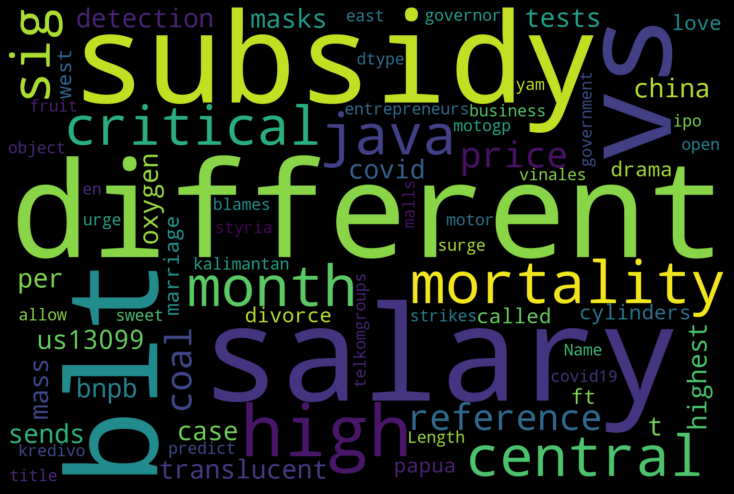

In [307]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
text = data['title(en)']
wordcloud = WordCloud(
    width = 1500,
    height = 1000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (10, 15),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()